In [550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier

Load the data set


In [551]:
df = pd.read_csv("Student_Performance_Missing.csv")
df.head()



,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,Yes,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,NaN,No,8.0,5.0,66.0


Handle missing values in the dataset

In [552]:
print(df.columns.tolist())

['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


In [553]:
df.isnull().sum()

Hours Studied                       1046
Previous Scores                      991
Extracurricular Activities           976
Sleep Hours                          954
Sample Question Papers Practiced    1035
Performance Index                    998
dtype: int64

In [554]:
df = df.fillna(df.mean(numeric_only=True))

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

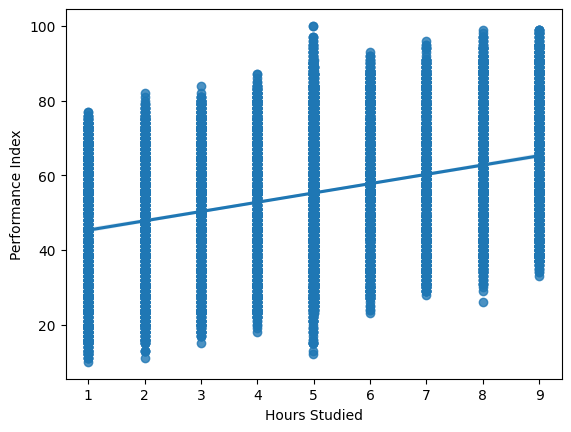

In [555]:
sns.regplot(df, x='Hours Studied', y='Performance Index')

In [556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier

Load the data set


In [557]:
df = pd.read_csv("Student_Performance_Missing.csv")
df.head()



,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,Yes,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,NaN,No,8.0,5.0,66.0


Handle missing values in the dataset

In [558]:
print(df.columns.tolist())

['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


In [559]:
df.isnull().sum()

Hours Studied                       1046
Previous Scores                      991
Extracurricular Activities           976
Sleep Hours                          954
Sample Question Papers Practiced    1035
Performance Index                    998
dtype: int64

In [560]:
df = df.fillna(df.mean(numeric_only=True))

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

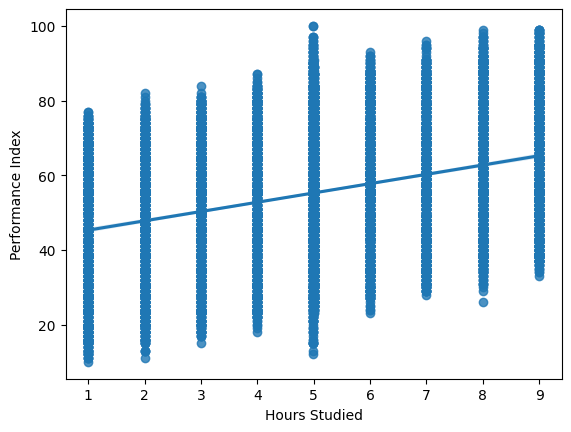

In [561]:
sns.regplot(df, x='Hours Studied', y='Performance Index')

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

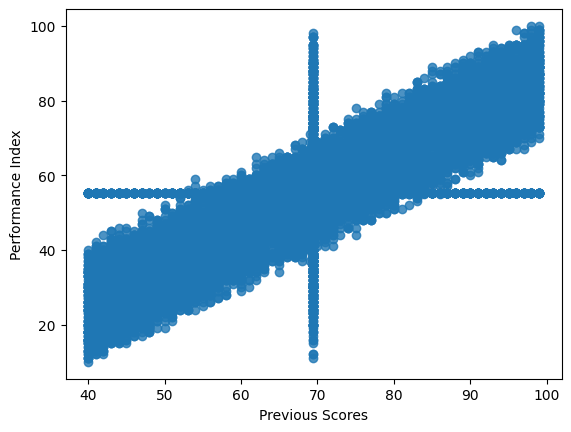

In [562]:
sns.regplot(df, x='Previous Scores', y='Performance Index')

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

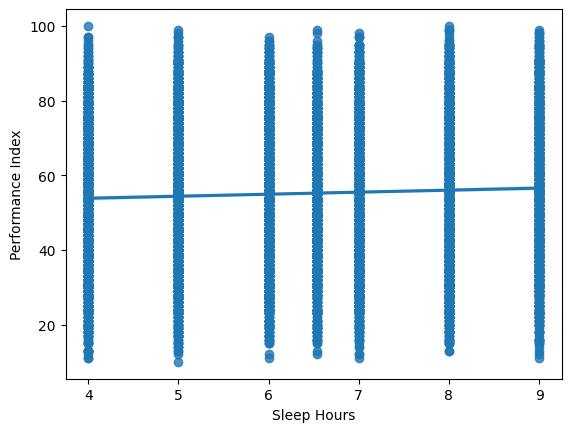

In [563]:
sns.regplot(df, x='Sleep Hours', y='Performance Index')

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

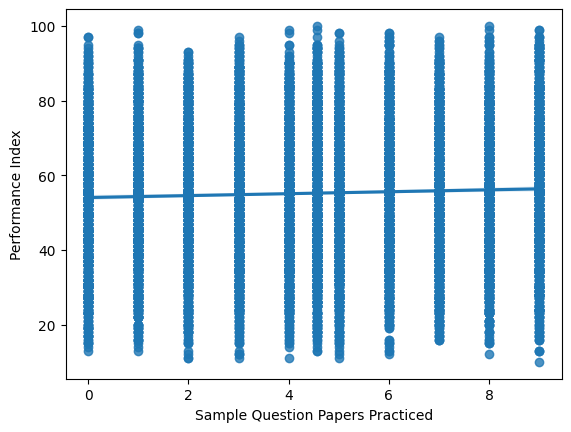

In [564]:
sns.regplot(df, x='Sample Question Papers Practiced', y='Performance Index')

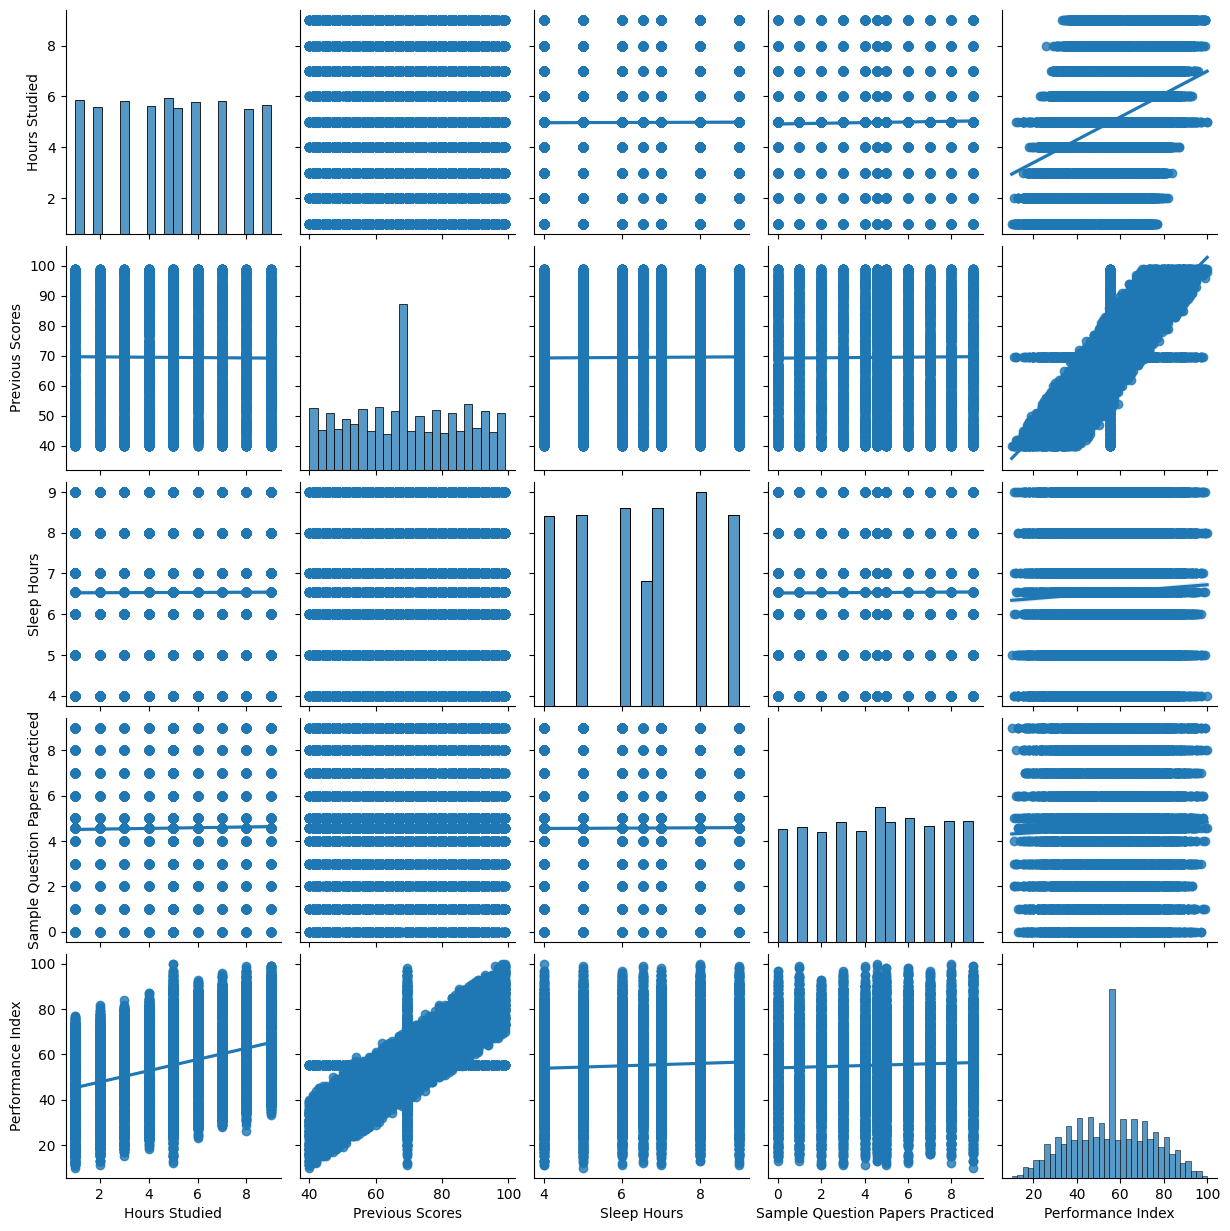

In [565]:
sns.pairplot(df, kind='reg')

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

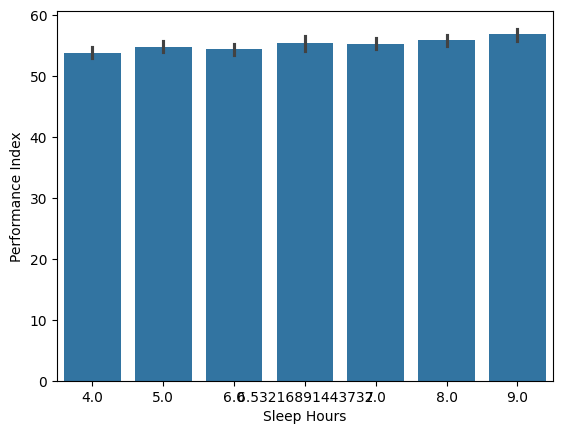

In [566]:
sns.barplot(df, x='Sleep Hours',y='Performance Index')

In [567]:
X = df.drop(columns = ['Performance Index'])
y=df['Performance Index']

In [568]:
print(X)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0               7.0        99.000000                        Yes     9.000000   
1               4.0        82.000000                         No     4.000000   
2               8.0        51.000000                        Yes     7.000000   
3               5.0        52.000000                        Yes     5.000000   
4               7.0        69.448995                         No     8.000000   
...             ...              ...                        ...          ...   
9995            1.0        49.000000                        Yes     4.000000   
9996            7.0        64.000000                        Yes     8.000000   
9997            6.0        83.000000                        NaN     8.000000   
9998            9.0        97.000000                        Yes     6.532169   
9999            7.0        74.000000                         No     6.532169   

      Sample Question Papers Practiced 

In [569]:
print(y)

0       91.000000
1       65.000000
2       45.000000
3       36.000000
4       66.000000
          ...    
9995    23.000000
9996    58.000000
9997    55.213175
9998    95.000000
9999    64.000000
Name: Performance Index, Length: 10000, dtype: float64


In [570]:
Xtrain, Xtest, ytrain,ytest= train_test_split(X,y,test_size=0.2,random_state=0)


In [571]:
cat_cols =X.select_dtypes(include=['object']).columns
num_cols =X.select_dtypes(include=['number']).columns


preprocess feature and bulid a pipeline

In [572]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [573]:
cat_pipe =Pipeline(
steps=[
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
    ]
    )

In [574]:
num_pipe =Pipeline(
    steps=[
        ('scaler',StandardScaler())
    ]
)

In [575]:
preprocessor= ColumnTransformer(transformers=[
    ('cat',cat_pipe,cat_cols),
    ('num',num_pipe,num_cols)
])

In [576]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
model= Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('lr',LinearRegression()) 
])

Empty markdown cell,double click to enter cell or edit


In [578]:
model.fit(Xtrain,ytrain)


,steps,"[('preprocessor', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [579]:
print(Xtrain.dtypes)
print(Xtrain.head())


Hours Studied                       float64
Previous Scores                     float64
Extracurricular Activities           object
Sleep Hours                         float64
Sample Question Papers Practiced    float64
dtype: object
      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
7389            5.0             95.0                         No          6.0   
9275            2.0             98.0                         No          7.0   
2995            2.0             65.0                        Yes          8.0   
5316            2.0             43.0                        Yes          8.0   
356             1.0             86.0                        NaN          5.0   

      Sample Question Papers Practiced  
7389                               4.0  
9275                               4.0  
2995                               1.0  
5316                               6.0  
356                                9.0  


In [580]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in Xtrain.columns:
    if Xtrain[col].dtype == 'object':
        Xtrain[col] = le.fit_transform(Xtrain[col])


In [581]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in Xtest.columns:
    if Xtest[col].dtype == 'object':
        Xtest[col] = le.fit_transform(Xtest[col])



In [582]:
Xtrain = pd.get_dummies(Xtrain, drop_first=True)

In [583]:
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [584]:


from joblib import dump,load  #dump is used to save the model and load is used to load the model
with open('models/student_performance_prediction.pkl','wb')as f:
    dump(regressor,f)
    print("Model dumped successfully")
    

Model dumped successfully


In [585]:
import joblib
import gradio as gr
import pandas as pd

def prediction(Hours , PreScores, ExtracurricularActivities, SleepHours, Sampleqp,Performance_Index):
    df = pd.DataFrame({
        'Hours ': [Hours],
        'PreScores': [PreScores],
        'Extracurricular Activities': [ExtracurricularActivities],
        'SleepHours': [SleepHours],
        'Sampleqp': [Sampleqp],
    })

    # Load joblib model
    with open('models/student_performance_prediction.pkl', 'rb') as f:
        regressor= load(f)

    # Predict
    Performance_Index = regressor.predict(df)
    return Performance_Index[0]

ui = gr.Interface(
    fn=prediction,
    inputs=['number', 'number', 'text', 'number', 'number'],
    outputs=gr.Text(),
    title='Student-related labels',
    examples=[[165349, 136897, 'yes', 125, 32]]
)

ui.launch()


c:\Users\ASUS PC\miniconda3\Lib\site-packages\gradio\utils.py:1074: UserWarning: Expected 6 arguments for function <function prediction at 0x000001BBA87C34C0>, received 5.
  warnings.warn(
c:\Users\ASUS PC\miniconda3\Lib\site-packages\gradio\utils.py:1078: UserWarning: Expected at least 6 arguments for function <function prediction at 0x000001BBA87C34C0>, received 5.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7879
* To create a public link, set `share=True` in `launch()`.


<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

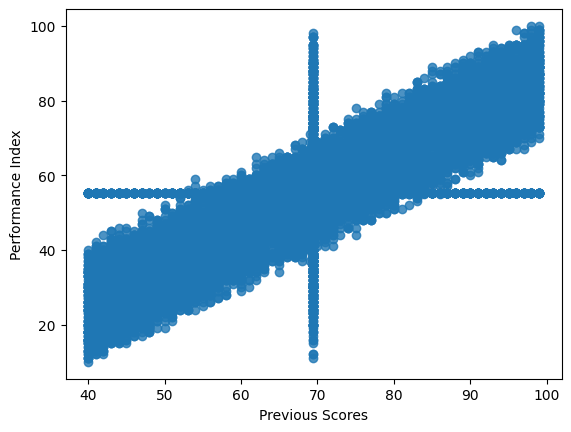

In [586]:
sns.regplot(df, x='Previous Scores', y='Performance Index')

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

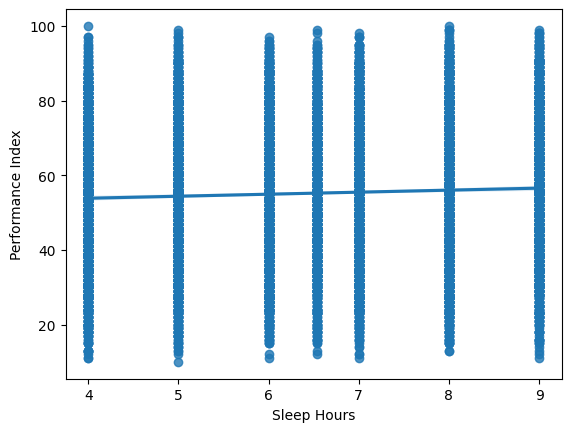

In [587]:
sns.regplot(df, x='Sleep Hours', y='Performance Index')

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

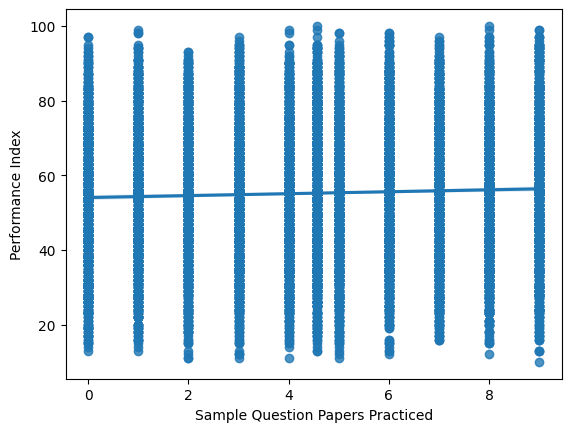

In [588]:
sns.regplot(df, x='Sample Question Papers Practiced', y='Performance Index')

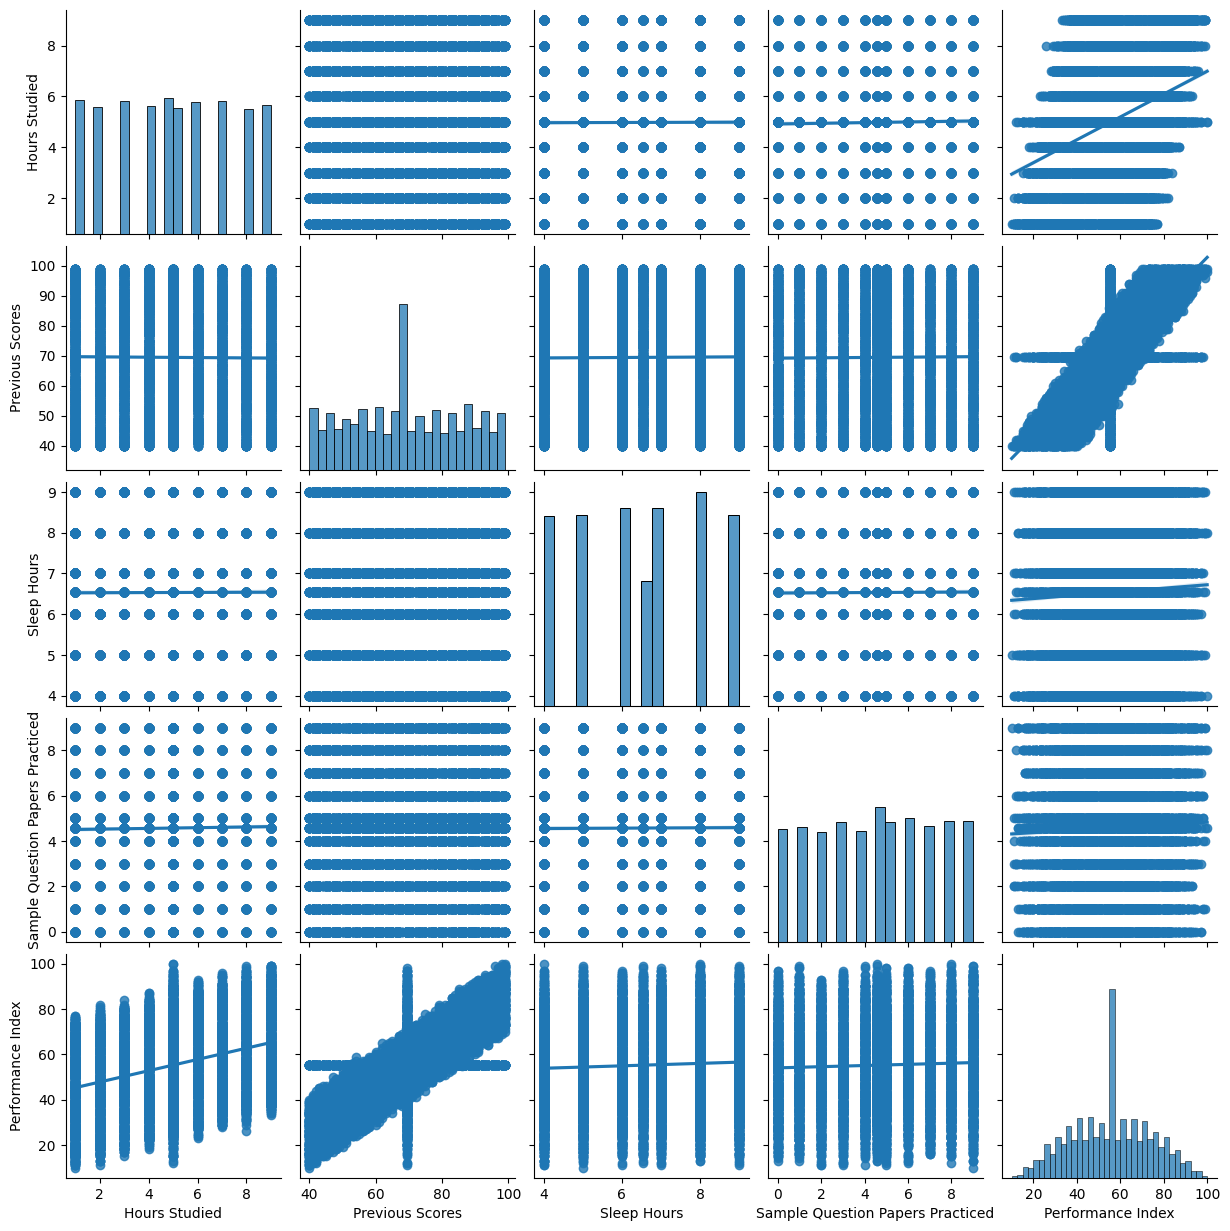

In [589]:
sns.pairplot(df, kind='reg')

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

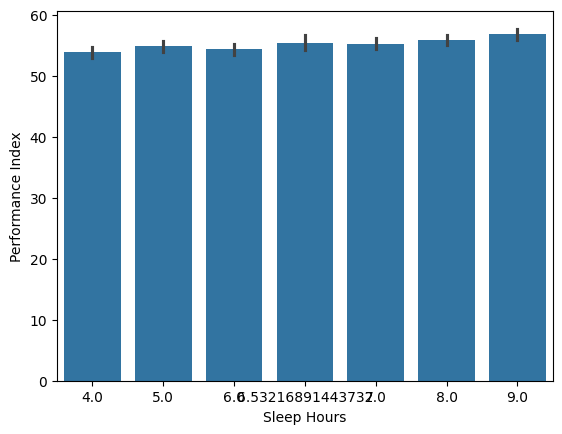

In [590]:
sns.barplot(df, x='Sleep Hours',y='Performance Index')

In [591]:
X = df.drop(columns = ['Performance Index'])
y=df['Performance Index']

In [592]:
print(X)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0               7.0        99.000000                        Yes     9.000000   
1               4.0        82.000000                         No     4.000000   
2               8.0        51.000000                        Yes     7.000000   
3               5.0        52.000000                        Yes     5.000000   
4               7.0        69.448995                         No     8.000000   
...             ...              ...                        ...          ...   
9995            1.0        49.000000                        Yes     4.000000   
9996            7.0        64.000000                        Yes     8.000000   
9997            6.0        83.000000                        NaN     8.000000   
9998            9.0        97.000000                        Yes     6.532169   
9999            7.0        74.000000                         No     6.532169   

      Sample Question Papers Practiced 

In [593]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [594]:
print(y)

0       91.000000
1       65.000000
2       45.000000
3       36.000000
4       66.000000
          ...    
9995    23.000000
9996    58.000000
9997    55.213175
9998    95.000000
9999    64.000000
Name: Performance Index, Length: 10000, dtype: float64


In [595]:
Xtrain, Xtest, ytrain,ytest= train_test_split(X,y,test_size=0.2,random_state=0)


In [596]:
cat_cols =X.select_dtypes(include=['object']).columns
num_cols =X.select_dtypes(include=['number']).columns


preprocess feature and bulid a pipeline

In [597]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [598]:
cat_pipe =Pipeline(
steps=[
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
    ]
    )

In [599]:
num_pipe =Pipeline(
    steps=[
        ('scaler',StandardScaler())
    ]
)

In [600]:
preprocessor= ColumnTransformer(transformers=[
    ('cat',cat_pipe,cat_cols),
    ('num',num_pipe,num_cols)
])

In [601]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [602]:
model= Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('lr',LinearRegression())
])

Empty markdown cell,double click to enter cell or edit


In [603]:
model.fit(Xtrain,ytrain)


,steps,"[('preprocessor', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [604]:
print(Xtrain.dtypes)
print(Xtrain.head())


Hours Studied                       float64
Previous Scores                     float64
Extracurricular Activities           object
Sleep Hours                         float64
Sample Question Papers Practiced    float64
dtype: object
      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
7389            5.0             95.0                         No          6.0   
9275            2.0             98.0                         No          7.0   
2995            2.0             65.0                        Yes          8.0   
5316            2.0             43.0                        Yes          8.0   
356             1.0             86.0                        NaN          5.0   

      Sample Question Papers Practiced  
7389                               4.0  
9275                               4.0  
2995                               1.0  
5316                               6.0  
356                                9.0  


In [605]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in Xtrain.columns:
    if Xtrain[col].dtype == 'object':
        Xtrain[col] = le.fit_transform(Xtrain[col])


In [606]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in Xtest.columns:
    if Xtest[col].dtype == 'object':
        Xtest[col] = le.fit_transform(Xtest[col])



In [607]:
Xtrain = pd.get_dummies(Xtrain, drop_first=True)

In [608]:
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [609]:


from joblib import dump,load  #dump is used to save the model and load is used to load the model
with open('models/student_performance_prediction.pkl','wb')as f:
    dump(regressor,f)
    print("Model dumped successfully")
    

Model dumped successfully


In [610]:
import joblib
import gradio as gr
import pandas as pd

def prediction(Hours , PreScores, ExtracurricularActivities, SleepHours, Sampleqp,Performance_Index):
    df = pd.DataFrame({
        'Hours ': [Hours],
        'PreScores': [PreScores],
        'ExtracurricularActivities': [ExtracurricularActivities],
        'SleepHours': [SleepHours],
        'Sampleqp': [Sampleqp],
        'Performance_Index':[Performance_Index]
    })

    # Load joblib model
    with open('models/student_performance_prediction.pkl', 'rb') as f:
        regressor= load(f)

    # Predict
    Performance_Index = regressor.predict(df)
    return Performance_Index[0]

ui = gr.Interface(
    fn=prediction,
    inputs=['number', 'number', 'text', 'number', 'number','number'],
    outputs=gr.Text(),
    title='Student-related labels',
    examples=[[165349, 136897, 'yes', 125, 32,38]]
)

ui.launch()


* Running on local URL:  http://127.0.0.1:7880
* To create a public link, set `share=True` in `launch()`.
